In [50]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits

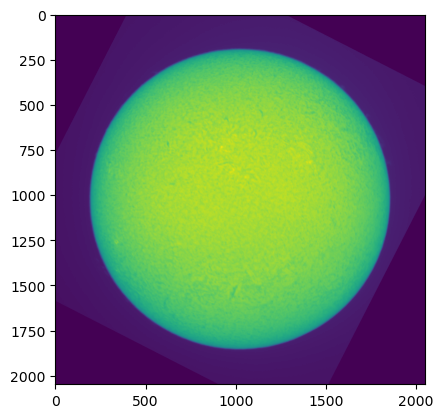

In [51]:
#'../data/L2/imoa_03933_l2_20240323_13052647_emi1.fts.bz2'

file = '../data/carrington_test_data/2022APR/imoa_06563_l1_20220411_12441466_emi1.fts.bz2'

with fits.open(file) as hdul:   
    hdu = hdul[0].copy()
    
plt.imshow(hdu.data);


In [52]:
import numpy as np

np.median(hdu.data)

19319.0

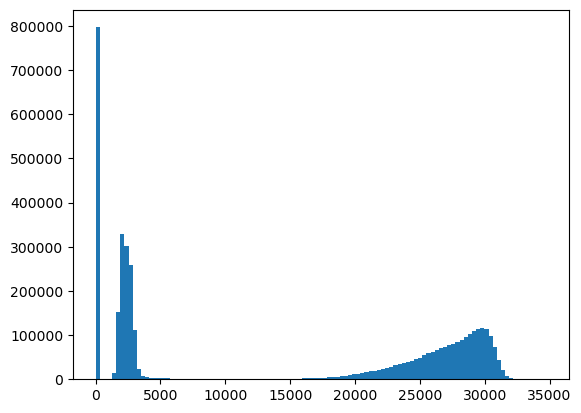

In [53]:
plt.hist(hdu.data.flatten(), bins='auto');

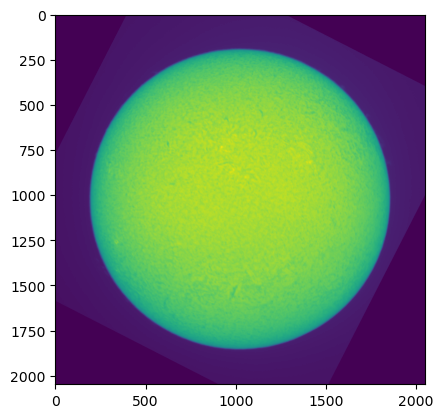

In [54]:
ret, disk = cv.threshold(hdu.data,np.median(hdu.data)/3,255,cv.THRESH_BINARY)
disk=disk.astype(np.uint8)
plt.imshow(hdu.data)
plt.imshow(disk, alpha=0);


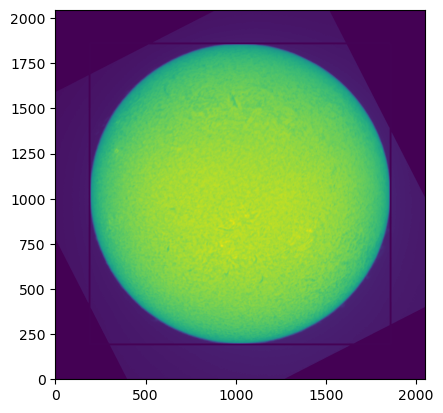

In [55]:

contours, _ = cv.findContours(disk, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Assuming the disk is the largest contour
largest_contour = max(contours, key=cv.contourArea)

# Get radius
x, y, w, h = cv.boundingRect(largest_contour)
hdu.header['rsun_obs'] = w/2.0 # sun radius in pixels

# Calculate centroid
M = cv.moments(largest_contour)
centroid_x = int(M["m10"] / M["m00"])
centroid_y = int(M["m01"] / M["m00"])

# Calculate translation required to center the centroid
rows, cols = disk.shape
center_x = cols // 2
center_y = rows // 2
translation_x = center_x - centroid_x
translation_y = center_y - centroid_y

# Translate the image
hdu.data = np.roll(hdu.data, translation_x, axis=1)
hdu.data = np.roll(hdu.data, translation_y, axis=0)

img=hdu.data.copy()
cv.rectangle(img, (x, y), (x + w, y + h), (255, 255, 255), 10)
plt.imshow(img, origin='lower')